In [43]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import MESS
import numpy as np
import os
import pandas as pd

from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the tree data

In [46]:
dorrigo_df = pd.read_csv("Dorrigo.csv", header=0, index_col=0)
nightcap_df = pd.read_csv("Nightcap.csv", header=0, index_col=0)
washpool_df = pd.read_csv("Washpool.csv", header=0, index_col=0)
site_df = {"Dorrigo":dorrigo_df, "Nightcap":nightcap_df, "Washpool":washpool_df}
for site, df in site_df.items():
    print("{} richness {}".format(site, len(df)))
    display(df[:5])

## Get metacommunity trait distribution (pool all traits for all sites)
metacommunity_traits = pd.concat([dorrigo_df, nightcap_df, washpool_df], axis=0)
metacommunity_traits = metacommunity_traits["trait"].unique()

print("S_m: {}".format(len(metacommunity_traits)))

Nightcap richness 51


,pi,trait
Acacia melanoxylon,0.000010,0.045522
Acradenia euodiiformis,0.000084,0.933994
Acronychia pubescens,0.000754,-0.273173
Alangium villosum,0.000020,-0.939426
Archirhodomyrtus beckleri,0.000078,1.749622


Dorrigo richness 53


,pi,trait
Acacia melanoxylon,0.001527,0.045522
Acradenia euodiiformis,0.000678,0.933994
Acronychia oblongifolia,0.000034,0.601673
Acronychia pubescens,0.000469,-0.273173
Alangium villosum,0.000000,-0.939426


Washpool richness 53


,pi,trait
Acacia melanoxylon,0.000028,0.045522
Acronychia oblongifolia,0.000007,0.601673
Acronychia pubescens,0.000010,-0.273173
Alangium villosum,0.000000,-0.939426
Alphitonia excelsa,0.000000,0.133814


S_m: 70


# Select the best model

In [ ]:
simfile = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=df, simfile=simfile, algorithm="rf",\
                                metacommunity_traits=metacommunity_traits, verbose=False)
for isl, df in site_df.items():
    if not os.path.exists(isl): os.mkdir(isl)
    cla.set_data(df)
    est, proba = cla.predict(select_features=True, param_search=True, quick=False, verbose=True)
    cla.dump(outfile="{}/{}_classifier.mdl".format(isl, isl))
    display(isl, est, proba)
    display(cla.feature_importances())
    cla.plot_feature_importance()

Predict() started: 2019-06-12 22:43:30.433410
Selecting features:
  community_assembly_model	['S', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'mean_local_traits', 'std_local_traits', 'skewness_local_traits', 'kurtosis_local_traits', 'median_local_traits', 'iqr_local_traits', 'mean_regional_traits', 'std_regional_traits', 'skewness_regional_traits', 'kurtosis_regional_traits', 'median_regional_traits', 'iqr_regional_traits', 'reg_loc_mean_trait_dif', 'reg_loc_std_trait_dif', 'reg_loc_skewness_trait_dif', 'reg_loc_kurtosis_trait_dif', 'reg_loc_median_trait_dif', 'reg_loc_iqr_trait_dif', 'pi_trait_cor', 'SGD_0', 'SGD_1', 'SGD_2', 'SGD_3', 'SGD_4']
All selected features: S pi_h1 pi_h2 pi_h3 pi_h4 mean_pi std_pi skewness_pi kurtosis_pi median_pi iqr_pi mean_local_traits std_local_traits skewness_local_traits kurtosis_local_traits median_local_traits iqr_local_traits mean_regional_traits std_regional_traits skewness_regional_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


# Estimate parameters
Set the target model to 'filtering' for the tree data.

In [49]:
rgr = MESS.inference.Regressor(empirical_df=df, simfile=simfile, target_model="filtering",\
                                algorithm="rfq", metacommunity_traits=metacommunity_traits)
for isl, df in site_df.items():
    rgr.set_data(df)
    est = rgr.predict(select_features=True, param_search=True, quick=True, verbose=False)
    rgr.dump(outfile="{}/{}_regressor.mdl".format(isl, isl))
    display(isl, est, rgr.feature_importances())

'Nightcap'

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1461.403779,0.168662,5041.298588,0.002673,19.350557,0.002941,0.368745
lower 0.025,1018.531872,0.001119,1800.321878,0.001120,1.413703,0.000673,0.051929
upper 0.975,2565.095688,0.908465,9471.000000,0.004130,62.517442,0.004800,0.974337


,S,SGD_0,iqr_local_traits,iqr_pi,iqr_regional_traits,kurtosis_local_traits,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,reg_loc_iqr_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_mean_trait_dif,reg_loc_median_trait_dif,reg_loc_skewness_trait_dif,reg_loc_std_trait_dif,skewness_pi,std_local_traits,std_pi
alpha,NaN,0.164972,NaN,0.064581,NaN,NaN,NaN,0.147728,0.387621,NaN,NaN,NaN,NaN,0.125179,NaN,NaN,NaN,NaN,0.109919,NaN,NaN,NaN
ecological_strength,NaN,NaN,NaN,NaN,0.244905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256012,NaN,NaN,NaN,NaN,0.225845,NaN,NaN,0.273238
J,0.480453,NaN,0.126537,NaN,NaN,NaN,NaN,NaN,NaN,0.091024,0.082325,0.064195,0.061146,0.094319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m,0.215305,0.164529,0.307001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508250,NaN,NaN,0.491750
speciation_prob,0.199594,0.303407,0.143142,NaN,NaN,0.132511,NaN,0.106083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115264
_lambda,0.052646,0.126519,0.081056,0.029482,NaN,NaN,0.042128,0.062237,NaN,NaN,NaN,NaN,NaN,0.061861,0.102805,0.060863,0.092915,0.086382,0.049862,0.037361,0.0513,0.062584


'Dorrigo'

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1471.570923,0.103452,4321.267030,0.006778,29.392431,0.002687,0.391606
lower 0.025,1014.132797,0.001090,1692.138415,0.003970,2.000000,0.000628,0.064552
upper 0.975,2534.126747,0.626243,8559.266829,0.009520,123.355048,0.004800,0.975441


,S,SGD_0,iqr_local_traits,iqr_pi,iqr_regional_traits,kurtosis_local_traits,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,reg_loc_iqr_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_mean_trait_dif,reg_loc_median_trait_dif,reg_loc_skewness_trait_dif,reg_loc_std_trait_dif,skewness_pi,std_local_traits,std_pi
alpha,NaN,0.164972,NaN,0.064581,NaN,NaN,NaN,0.147728,0.387621,NaN,NaN,NaN,NaN,0.125179,NaN,NaN,NaN,NaN,0.109919,NaN,NaN,NaN
ecological_strength,NaN,NaN,NaN,NaN,0.244905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256012,NaN,NaN,NaN,NaN,0.225845,NaN,NaN,0.273238
J,0.480453,NaN,0.126537,NaN,NaN,NaN,NaN,NaN,NaN,0.091024,0.082325,0.064195,0.061146,0.094319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m,0.215305,0.164529,0.307001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508250,NaN,NaN,0.491750
speciation_prob,0.199594,0.303407,0.143142,NaN,NaN,0.132511,NaN,0.106083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115264
_lambda,0.052646,0.126519,0.081056,0.029482,NaN,NaN,0.042128,0.062237,NaN,NaN,NaN,NaN,NaN,0.061861,0.102805,0.060863,0.092915,0.086382,0.049862,0.037361,0.0513,0.062584


'Washpool'

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,1336.431515,0.237484,4228.870236,0.006778,20.170973,0.002996,0.398087
lower 0.025,1024.434086,0.001141,1681.512336,0.003970,1.345834,0.000660,0.013510
upper 0.975,2343.980772,0.943878,8466.624746,0.009520,64.992719,0.004800,0.973208


,S,SGD_0,iqr_local_traits,iqr_pi,iqr_regional_traits,kurtosis_local_traits,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,reg_loc_iqr_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_mean_trait_dif,reg_loc_median_trait_dif,reg_loc_skewness_trait_dif,reg_loc_std_trait_dif,skewness_pi,std_local_traits,std_pi
alpha,NaN,0.164972,NaN,0.064581,NaN,NaN,NaN,0.147728,0.387621,NaN,NaN,NaN,NaN,0.125179,NaN,NaN,NaN,NaN,0.109919,NaN,NaN,NaN
ecological_strength,NaN,NaN,NaN,NaN,0.244905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256012,NaN,NaN,NaN,NaN,0.225845,NaN,NaN,0.273238
J,0.480453,NaN,0.126537,NaN,NaN,NaN,NaN,NaN,NaN,0.091024,0.082325,0.064195,0.061146,0.094319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m,0.215305,0.164529,0.307001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508250,NaN,NaN,0.491750
speciation_prob,0.199594,0.303407,0.143142,NaN,NaN,0.132511,NaN,0.106083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115264
_lambda,0.052646,0.126519,0.081056,0.029482,NaN,NaN,0.042128,0.062237,NaN,NaN,NaN,NaN,NaN,0.061861,0.102805,0.060863,0.092915,0.086382,0.049862,0.037361,0.0513,0.062584


  [####################] 100% Performing simulations 
Calculating PCs and plotting
  [####################] 100% Performing simulations 
Calculating PCs and plotting
  [####################] 100% Performing simulations 
Calculating PCs and plotting


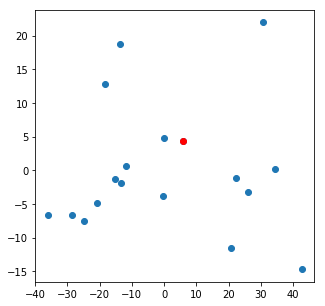

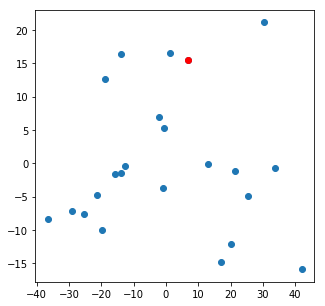

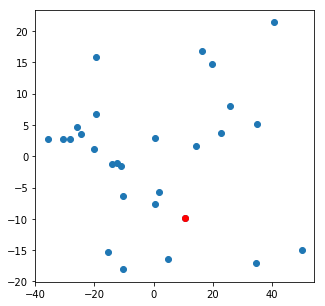

In [29]:
## This is broken, it should pull the est params for each community from the rgr model.
for isl, df in site_df.items():
    MESS.posterior_predictive_check(empirical_df=df, nsims=5, parameter_estimates=est, verbose=True)

# Trash below here